In [1]:
# Database link
# https://www.kaggle.com/lava18/google-play-store-apps/version/6#googleplaystore.csv

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import time
import math

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
%matplotlib inline

In [3]:
original_data = pd.read_csv('./googleplaystore.csv')

# Remove false data.
original_data = original_data.drop(original_data[original_data.Rating > 5.0].index)
original_data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [4]:
# 1

# Top 10 highest rated apps

top_ten_rated = original_data.sort_values('Rating', ascending=False)
top_ten_rated = top_ten_rated[['App', 'Rating']]
top_ten_rated = top_ten_rated.iloc[:10]
top_ten_rated.set_index('App', inplace=True)

top_ten_rated

,Rating
App,
Santa's Monster Shootout DX,5.0
DG TV,5.0
PK and DK Audio App,5.0
HON. B.J. ACS COLLEGE ALE,5.0
BJ Foods,5.0
Read it easy for BK,5.0
ER Assist,5.0
BK Video Status,5.0
BK Formula Calculator,5.0


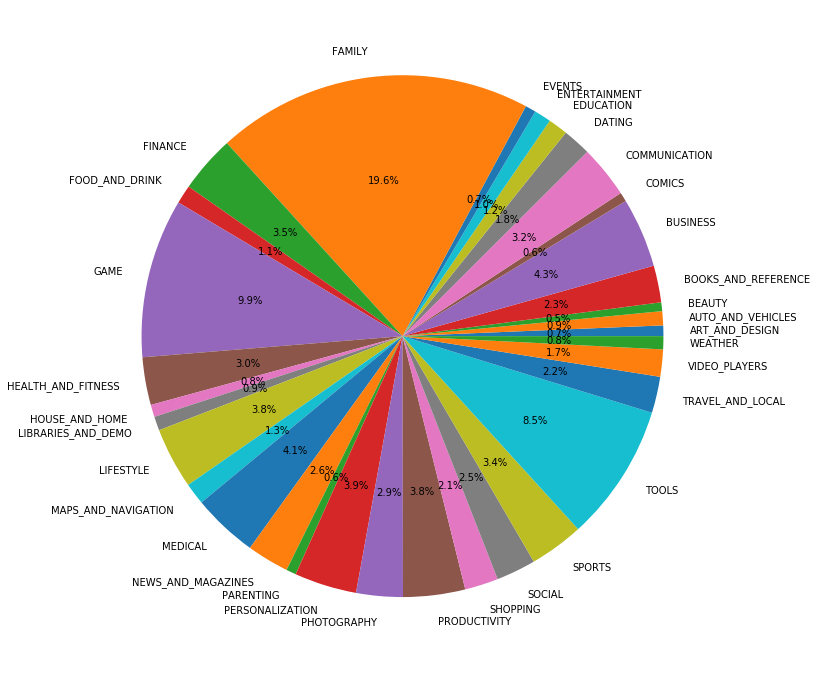

In [5]:
#2

# Pie chart of distribution of app categories.

# Get the number of unique apps for each category.
category_data = original_data.groupby('Category')['App'].nunique()

plt.figure(figsize=(12,12))
cat_dist = plt.subplot()
cat_dist_plot = cat_dist.pie(category_data, labels=category_data.index, autopct='%1.1f%%')


<BarContainer object of 2 artists>

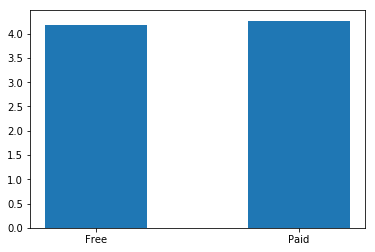

In [6]:
# 3

# Rating vs Type

rating_installs = original_data[['Rating', 'Installs']]
rating_type = original_data[['Rating', 'Type']]
rating_type = rating_type.groupby('Type').mean()
rating_type

plt.bar(rating_type.index, height=rating_type['Rating'], width=0.5)

Text(0, 0.5, 'Apps Category')

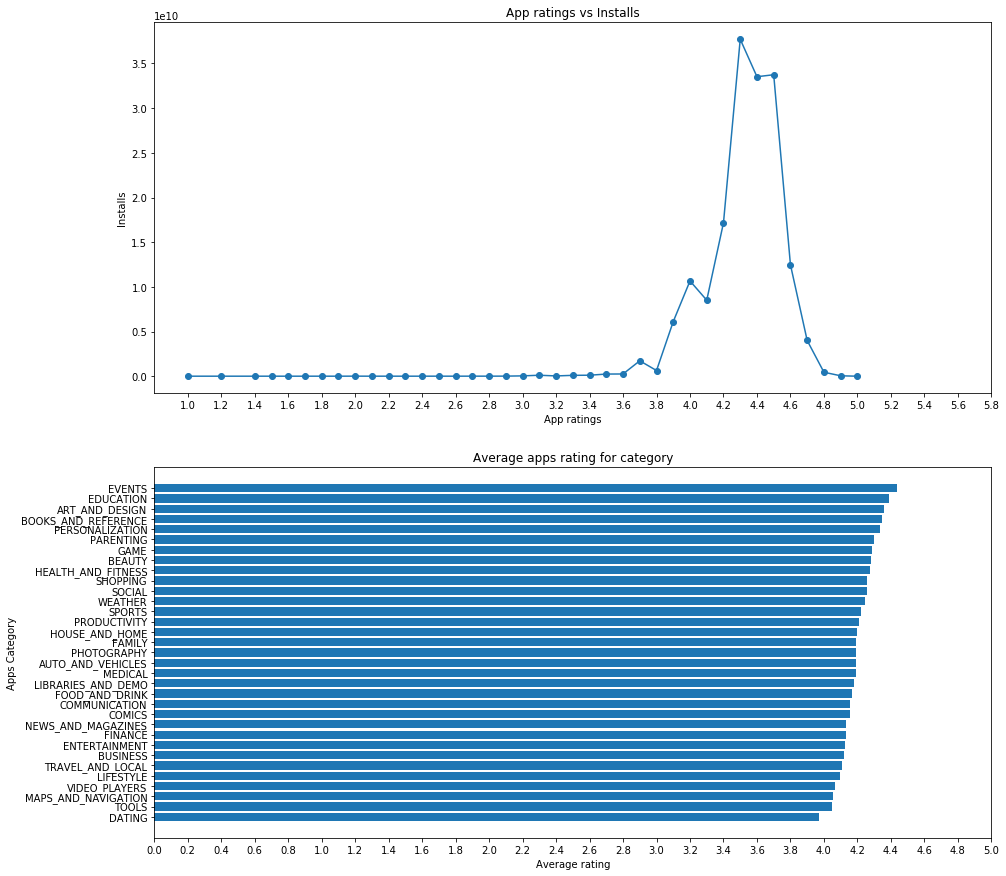

In [55]:
# 4

# Rating vs Installs

rating_inst = original_data[['Rating', 'Installs']]
rating_inst.loc[:, 'Installs'] = rating_inst.loc[:, 'Installs'].str.replace(',', '')
rating_inst.loc[:, 'Installs'] = rating_inst.loc[:, 'Installs'].str.replace('+', '')
rating_inst.loc[:, 'Installs'] = rating_inst.loc[:, 'Installs'].astype(np.int64)
rating_inst_grp = rating_inst.groupby('Rating').sum()

rating_cat = original_data[['Rating', 'Category']]
rating_cat = rating_cat.groupby('Category').mean()
rating_cat = rating_cat.sort_values(by='Rating')

plt.figure(figsize=(15,15))
plt.subplot(2, 1, 1)
x1 = rating_inst_grp.index
y1 = rating_inst_grp.loc[:, 'Installs']
plt.plot(x1, y1, 'o-')
plt.xticks(np.arange(min(x1), max(x1)+1, 0.2))
plt.title('App ratings vs Installs')
plt.ylabel('Installs')
plt.xlabel('App ratings')

plt.subplot(2, 1, 2)
x2 = rating_cat.index
y2 = rating_cat.loc[:, 'Rating']
plt.barh(x2, width=y2)
plt.xticks(np.arange(0, 5.2, 0.2))
plt.title('Average apps rating for category')
plt.xlabel('Average rating')
plt.ylabel('Apps Category')

[(0.0, 18.174246891973652), (1, 5)]

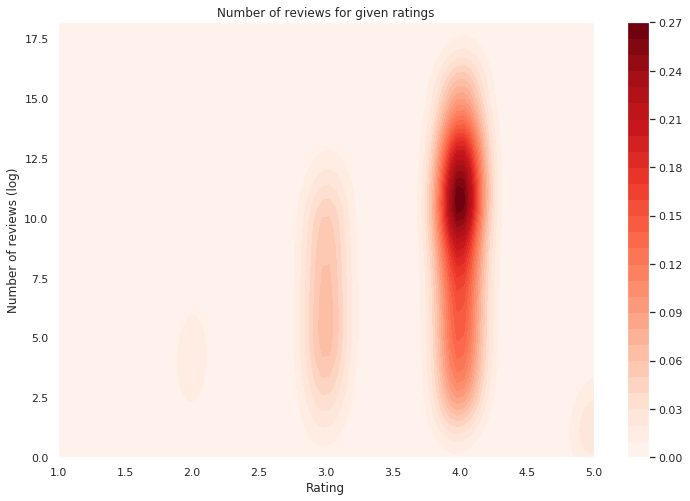

In [139]:
# 5

cubehelix_fig = plt.figure(figsize=(12, 8))
rating_rev = original_data[pd.notnull(original_data['Rating'])]
rating_rev = rating_rev[['Rating', 'Reviews']]
rating_rev.loc[:, 'Rating'] = rating_rev.loc[:, 'Rating'].astype(np.int64)
rating_rev.loc[:, 'Reviews'] = rating_rev.loc[:, 'Reviews'].astype(np.int64)
rating_rev['Reviews'] = np.log(rating_rev['Reviews'])

x = rating_rev['Rating']
y = rating_rev['Reviews']
ax = sns.kdeplot(x, y, cmap='Reds', shade=True, cbar=True, n_levels=30)
ax.set(xlabel='Rating', ylabel='Number of reviews (log)', title='Number of reviews for given ratings')
ax.set(xlim=(min(x), max(x)), ylim=(min(y), max(y)))